# **Gerekli Kütüphanelerin Eklenmesi ve Dataset'in importu**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.losses import SparseCategoricalCrossentropy

image_data = tf.keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels) = image_data.load_data()

### **Train Image[0] nesnesinin array görünümü**

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

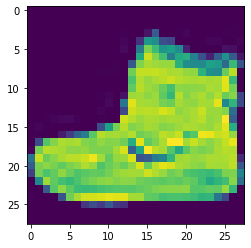

In [ ]:
plt.imshow(train_images[0])

### **0'dan 255'e kadar değerlere sahip olan array içerisinde işlem yapabilmek için verilerimizin tüm değerlerini 255.0 ile bölüm işlemine dahil ediyoruz. Böylece elimizdeki tüm veriler 0-1 aralığında olacaktır.**


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Artık değerlerimiz 0 ile 1 arasında olduğuna göre işlem yapılmaya hazırdır.**

## **Model Oluşturmak**

In [ ]:
model = Sequential([
                             Flatten(input_shape = (28,28)), ## Reshaping for my image.
                             Dense(128,activation="relu"), ## 128 tane çıkışı olan fully connected katman eklemesi ve aktivasyon olarak ReLu fonksiyonu tanımı. 
                             Dense(10) ## 10 tane çıkışı olan fully connected katman eklemesi
])

Son katmanda 10 adet çıkışı olan katman eklenmesinin sebebi ise aşağıdaki gibi nesnelerimizi 10 farklı sınıfa bölmemizden kaynaklanmaktadır. 

0-) T-shirt/top 

1-) Trouser 

2-) Pullover 

3-) Dress 

4-) Coat 

5-) Sandal 

6-) Shirt 

7-) Sneaker 

8-) Bag 

9-) Ankle boot

In [ ]:
def Item_Name(max_index):
  switcher = {
      0: "T-shirt / Top",
      1: "Trouser",
      2: "Pullover",
      3: "Dress",
      4: "Coat",
      5: "Sandal",
      6: "Shirt",
      7: "Sneaker",
      8: "Bag",
      9: "Ankle Boot",
  }
  return switcher.get(max_index, "nothing")

### **Modeli Derlemek (Compiling Model)**

Optimizer, öğrenme oranını kontrol eder. Optimizer olarak “adam” kullanıyoruz. Adam genellikle birçok durumda kullanmak için iyi bir optimizasyon algoritmasıdır. Adam algoritması, eğitim boyunca öğrenme oranını ayarlar.

Loss, Kayıp fonksiyonu, tahmin edilen bir değerin gerçek değerinden ne kadar uzak olduğunu ölçer. Bu derlenme aşaması için SparseCategoricalCrossentropy kullanılmıştır.

In [ ]:
model.compile(optimizer = "adam",
              loss = SparseCategoricalCrossentropy(from_logits = True), # Modeldeki kaybı ölçer. Yanlış tahmin edilen nesnede ne kadarlık bir yanlışlık var? Ne kadar hata var?
              metrics = ["accuracy"]
              )

### **Modeli Eğitmek (Training Model)**

Modeli eğitme aşamasında, eğitim görüntülerini ve eğitim katmanlarını fit metoduna sokuyoruz. Epoch sayısını ise 10 olarak belirliyoruz ki model 10 iterasyon eğitilsin. 10 iterasyonda eğitim TensorFlow'un kendi sayfasında optimal seviyedeki eğitim sayısı olarak geçmektedir.

In [ ]:
model.fit(train_images,train_labels,epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4982 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3746 - accuracy: 0.8671
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3380 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3128 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2958 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2818 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2678 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9027
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2466 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

Görüldüğü üzere her epoch ilerlemesinde modelimizin kayıp değeri düşerken doğruluk oranı ise yükselmektedir. Bu demektir ki model başarılı bir şekilde eğitildi.

### **Modelin Tahmin Etme Aşaması (Model Prediction)**

Tahmin için öncelikli olarak Test Görüntülerimizi Predict metotu ile işleme alıyoruz.

In [ ]:
ModelPredict = model.predict(test_images)[0]
ModelPredict

array([-11.584468 , -15.64943  , -14.435159 , -19.434505 , -17.072332 ,
        -2.3809652, -11.001819 ,   2.9767754, -10.813957 ,   7.061974 ],
      dtype=float32)

Görüldüğü üzere pek çok farklı değer geldi ancak bizim doğru tahmin edebilmemiz için değerlera rasındaki en yüksek değerin indeksini bulmamız gerekmektedir.

In [ ]:
max = ModelPredict[0]

max_index = 0
for i in range(1,len(ModelPredict)):
  if ModelPredict[i] > max:
    max = ModelPredict[i]
    max_index = i
 
print(f'Max index is : {max_index}')

Max index is : 9


Bulunan index'in eşitliği Item_Name tanımlı fonksiyon ile bulunarak eşyanın ismi ekrana gelmektedir.

Item name is =>  Ankle Boot 



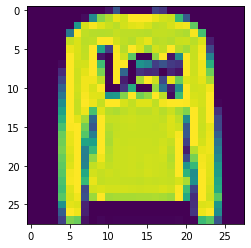

In [ ]:
print("Item name is => ",Item_Name(max_index),"\n")

plt.imshow(test_images[1])

### **Örnek Tahminler**

Komut satırlarının sonucunda 3 çıktı elde ediyoruz.
1. Tespit edilen dizinin maksimum elementinin indexi
2. Bu indeksin karşılığı olan eşyanın ismi
3. Bu indeksin karşılığı olan eşyanın şekli.

**0 İndeksli Eşyanın Tahmini**

Max index is : 9
Item name is =>  Ankle Boot 



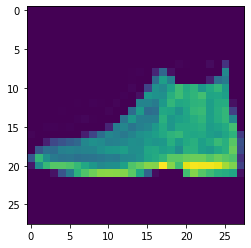

In [ ]:
ModelPredict = model.predict(test_images)[0]
ModelPredict

max = ModelPredict[0]
max_index = 0
for i in range(1,len(ModelPredict)):
  if ModelPredict[i] > max:
    max = ModelPredict[i]
    max_index = i
 
print(f'Max index is : {max_index}')

print("Item name is => ",Item_Name(max_index),"\n")

plt.imshow(test_images[0])

**1 İndeksli Eşyanın Tahmini**

Max index is : 1
Item name is =>  Trouser 



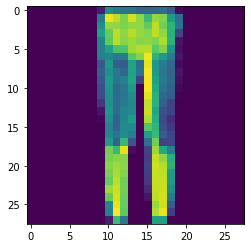

In [ ]:
ModelPredict = model.predict(test_images)[3]
ModelPredict

max = ModelPredict[0]
max_index = 0
for i in range(1,len(ModelPredict)):
  if ModelPredict[i] > max:
    max = ModelPredict[i]
    max_index = i
 
print(f'Max index is : {max_index}')

print("Item name is => ",Item_Name(max_index),"\n")

plt.imshow(test_images[3])

**4 İndeksli Eşyanın Tahmini**

Max index is : 0
Item name is =>  T-shirt / Top 



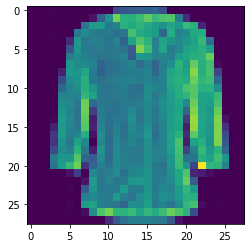

In [ ]:
ModelPredict = model.predict(test_images)[4]
ModelPredict

max = ModelPredict[0]
max_index = 0
for i in range(1,len(ModelPredict)):
  if ModelPredict[i] > max:
    max = ModelPredict[i]
    max_index = i
 
print(f'Max index is : {max_index}')

print("Item name is => ",Item_Name(max_index),"\n")

plt.imshow(test_images[4])

**125 İndeksli Eşyanın Tahmini**

Max index is : 0
Item name is =>  T-shirt / Top 



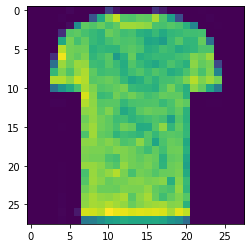

In [ ]:
ModelPredict = model.predict(test_images)[125]
ModelPredict

max = ModelPredict[0]
max_index = 0
for i in range(1,len(ModelPredict)):
  if ModelPredict[i] > max:
    max = ModelPredict[i]
    max_index = i
 
print(f'Max index is : {max_index}')

print("Item name is => ",Item_Name(max_index),"\n")

plt.imshow(test_images[125])

**2546 İndeksli Eşyanın Tahmini**

Max index is : 4
Item name is =>  Coat 



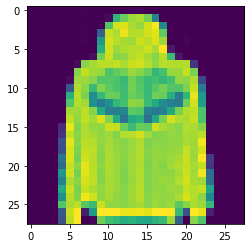

In [ ]:
ModelPredict = model.predict(test_images)[2546]
ModelPredict

max = ModelPredict[0]
max_index = 0
for i in range(1,len(ModelPredict)):
  if ModelPredict[i] > max:
    max = ModelPredict[i]
    max_index = i
 
print(f'Max index is : {max_index}')

print("Item name is => ",Item_Name(max_index),"\n")

plt.imshow(test_images[2546])

**5644 İndeksli Eşyanın Tahmini**

Max index is : 5
Item name is =>  Sandal 



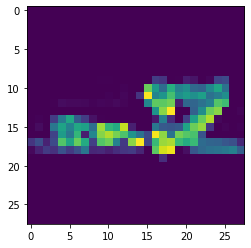

In [ ]:
ModelPredict = model.predict(test_images)[5644]
ModelPredict

max = ModelPredict[0]
max_index = 0
for i in range(1,len(ModelPredict)):
  if ModelPredict[i] > max:
    max = ModelPredict[i]
    max_index = i
 
print(f'Max index is : {max_index}')

print("Item name is => ",Item_Name(max_index),"\n")

plt.imshow(test_images[5644])